In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
customer_data = pd.read_csv('../data/Mall_Customers.csv')

# check head(first 5)/info of table
customer_data.info()
customer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# check for missing/null values

customer_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

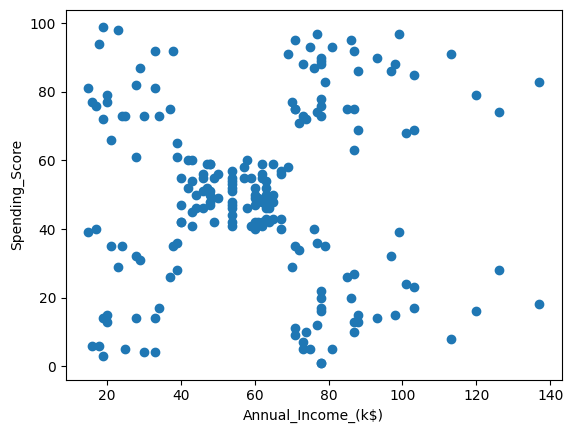

In [3]:
# scatter plot

plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

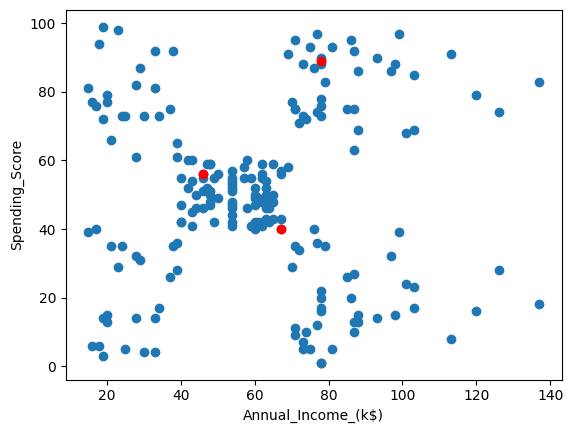

In [4]:
# It is difficult to identify patterns from the above figure, so we apply clustering
# first choose a random n for K
K=3

#get random centroids
centroid = customer_data.sample(n=K) 
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'])
plt.scatter(centroid['Annual_Income_(k$)'] , centroid['Spending_Score'] , c='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [5]:
# The Genre is a categorical feature, 
# so we need to change it to numerical through one-hot encoding

customer_data = pd.get_dummies(customer_data, columns=['Genre'] , drop_first=True)
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [6]:
# Identify centroid
# mask has the values of centroid where CustomerID in customer_data is in centroid
mask = customer_data['CustomerID'].isin(centroid.CustomerID.tolist())
print(mask.head())

# Filters data where customer_data is not in mask
X= customer_data[~mask]
X.head()

0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool


,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [7]:
# Apply clustering loop

diff = 1
j=0
XD=X

while(diff != 0):
    i=1
    
    for cent_index, row_c in centroid.iterrows():
        ED = [] # Euclidean distance 
        for customer_index, row_d in XD.iterrows():
            d1 = (row_c['Annual_Income_(k$)'] - row_d['Annual_Income_(k$)'])**2
            d2 = (row_c['Spending_Score'] - row_d['Spending_Score'])**2
            dist = np.sqrt(d1 + d2)
            ED.append(dist)
        X[i]=ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos =1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X['Cluster']=C
    print(X)
    
   #Update Centroids
   #The new centroids are calculated as the mean of the points in each cluster. 
   # If it's the first iteration, diff is set to 1 to ensure the loop continues. 
   # Otherwise, diff is updated based on the change in centroid positions.

    try:
        centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]
    except Exception as e:
        print(f'error : {str(e)}')
        
    #check for convergence
    #The loop continues until the centroids no longer change significantly, indicating that the algorithm has converged.
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()
    centroids = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1           2          3  Cluster  
0    35.355339   80.430094  52.009614        1  
1    39.824616   63.505905  66.219333

C:\Users\aliya\AppData\Local\Temp\ipykernel_13636\596423964.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\aliya\AppData\Local\Temp\ipykernel_13636\596423964.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\aliya\AppData\Local\Temp\ipykernel_13636\596423964.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

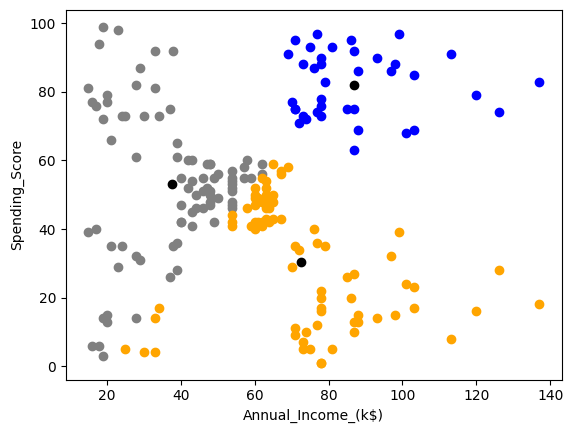

In [10]:
# plot the results
colors = ["grey" , "blue" , "orange"]
for k in range(K):
    data = X[X['Cluster'] == k+1]
    plt.scatter(data['Annual_Income_(k$)'] , data['Spending_Score'], c=colors[k])
plt.scatter(centroids['Annual_Income_(k$)'], centroids['Spending_Score'], c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()